In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import networkx as nx
from networkx import DiGraph

from matplotlib.patches import FancyArrowPatch, Circle, Ellipse

In [2]:
from GraphDrawer import Graph

### Генерируем данные


In [3]:
from ProcessGenerator import FeatureGenerator, SimpleProcessMaker

In [4]:
stages = np.array(['A', 'B', 'C', 'D', 'E', 'F'])
probas=np.array([0.1, 0.8, 0.7, 0.5, 0.5, 0.03])
# stages = np.arange(50).astype(str)
# probas = np.random.randint(0,1,50)
maker = SimpleProcessMaker(stages=stages, probas=probas)

In [5]:
%%time
gen_df = pd.DataFrame()
for idx in range(200):
    d = maker.make_process_sample(idx)
    gen_df = gen_df.append(d)
    
gen_df

CPU times: user 226 ms, sys: 2.93 ms, total: 229 ms
Wall time: 227 ms


,id,stages,dt
0,0,A,2020-01-01
1,0,E,2020-01-06
2,0,F,2020-01-11
0,1,A,2020-01-01
1,1,E,2020-01-06
...,...,...,...
2,198,F,2020-01-08
0,199,A,2020-01-01
1,199,C,2020-01-10
2,199,F,2020-01-18


In [6]:
gen = FeatureGenerator()

In [7]:
%%time
num_users = 5
# num_users = 50
gen_df['user'] = ['user_' + gen.label_features(label_type='string', nb_unique_labels=num_users)[0][-1] for _ in range(len(gen_df))]
gen_df.head()

CPU times: user 21 ms, sys: 2.53 ms, total: 23.5 ms
Wall time: 21.5 ms


,id,stages,dt,user
0,0,A,2020-01-01,user_2
1,0,E,2020-01-06,user_4
2,0,F,2020-01-11,user_3
0,1,A,2020-01-01,user_2
1,1,E,2020-01-06,user_0


### Переводим пользователей и действия в id и создаем словари чтобы потом отрисовать

In [8]:
gen_df["user_id"] = gen_df['user']
gen_df['stage_id'] = gen_df['stages']

act_id = dict()
id_act = dict()
usr_id = dict()
id_usr = dict()

for i, act in enumerate(np.unique(gen_df.stages)):
    act_id[act] = i
    id_act[i] = act

for i, usr in enumerate(np.unique(gen_df.user)):
    usr_id[usr] = i
    id_usr[i] = usr

    
user_id = [usr_id[x] for x in gen_df['user'].values]
stage_id = [act_id[x] for x in gen_df['stages'].values]

gen_df.user_id = user_id
gen_df.stage_id = stage_id

### Отрисовываем графы

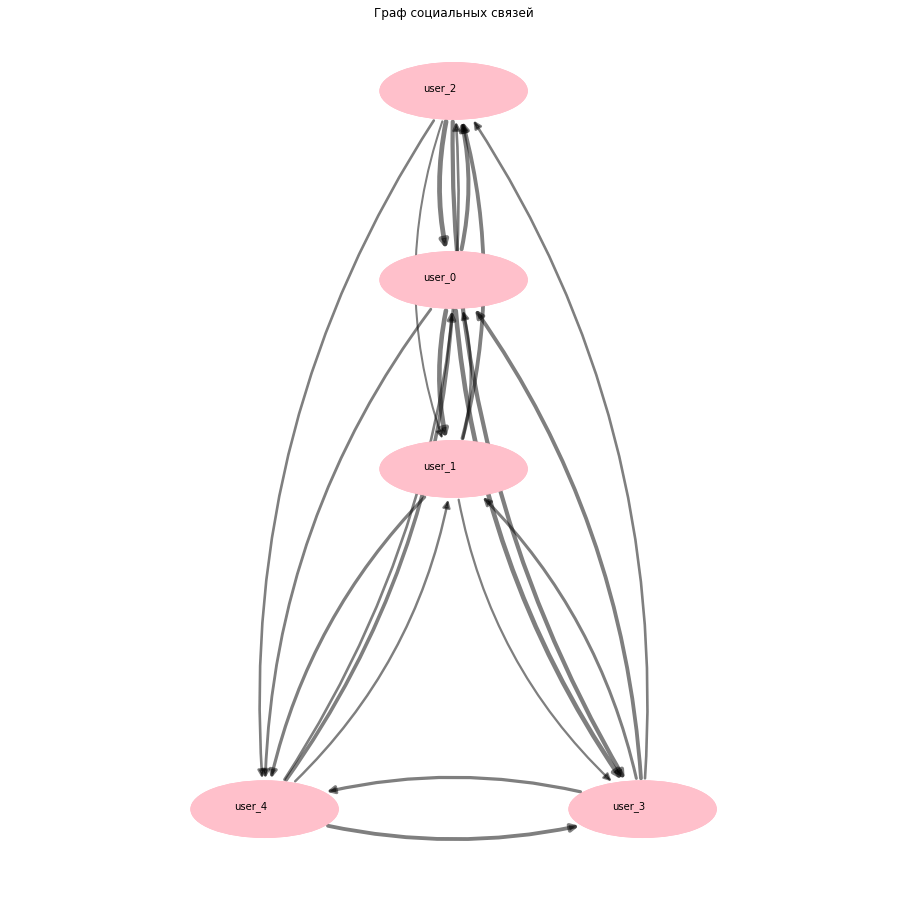

CPU times: user 743 ms, sys: 7.24 ms, total: 750 ms
Wall time: 748 ms


In [9]:
%%time
graph = Graph(gen_df, 'id', 'stages', 'user_id', 'dt')
graph.create_users_graph()
graph.draw_users(alpha=2.5,        # параметр для регулировки толщины линий
                 labels=id_usr,  # словарь с именами пользователей  
                 main_nodes=3)   # число основных узлов которые рисуем отдельно

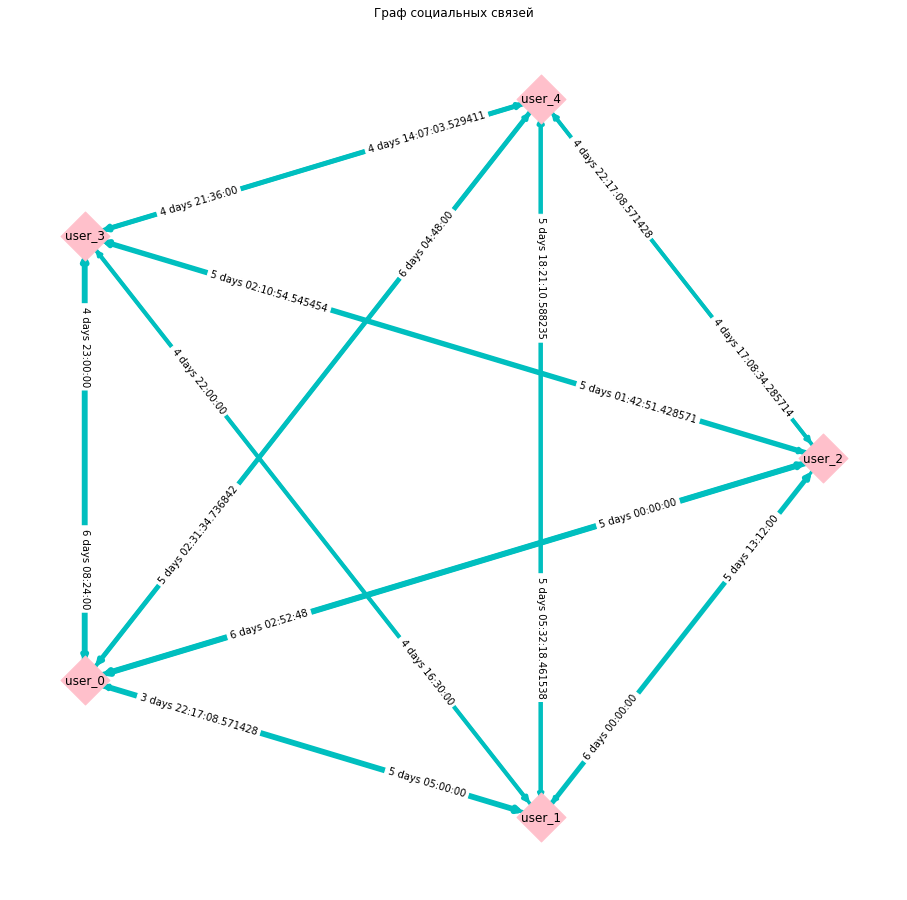

CPU times: user 413 ms, sys: 11.4 ms, total: 425 ms
Wall time: 423 ms


In [10]:
%%time
graph.draw_users(alpha=0.2, 
                labels=id_usr, 
                layout=nx.circular_layout, 
                info='time',              # вывести информацию о среднем времени перехода на ребра
                style=None,
                node_size=1200)

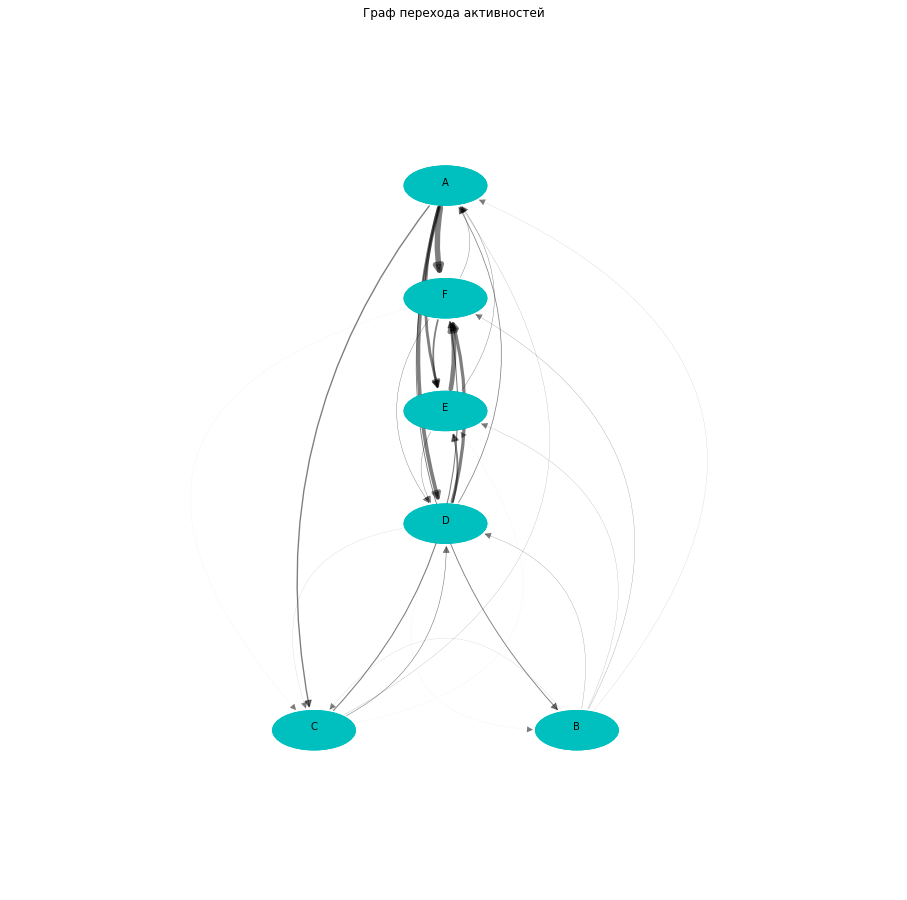

CPU times: user 852 ms, sys: 4.99 ms, total: 857 ms
Wall time: 857 ms


In [11]:
%%time
graph = Graph(gen_df, 'id', 'stage_id', 'user_id', 'dt')
graph.create_activities_graph()
graph.draw_activities(alpha=1, labels=id_act)

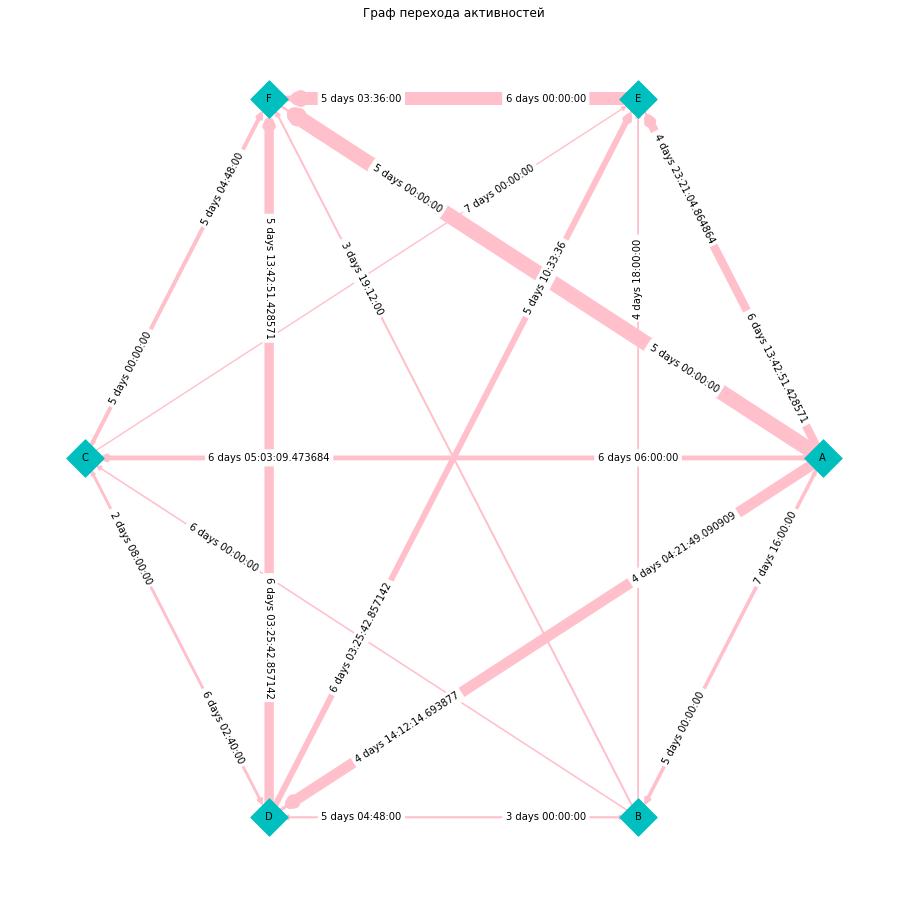

CPU times: user 578 ms, sys: 18 ms, total: 596 ms
Wall time: 597 ms


In [12]:
%%time
graph.draw_activities(alpha=0.2, 
                      labels=id_act, 
                      layout=nx.circular_layout, 
                      info='time',              # вывести информацию о среднем времени перехода на ребра
                      style=None)

### На примере из Ван Дер Аалста 

In [13]:
log = pd.read_csv("pm_data/Chapter_1/running-example.csv", sep=';')
log['datetime'] = pd.to_datetime(log["dd-MM-yyyy:HH.mm"], format='%d-%m-%Y:%H.%M')
log.drop("dd-MM-yyyy:HH.mm", axis=1, inplace=True)
log.head(10)

,Case ID,Event ID,Activity,Resource,Costs,datetime
0,1,35654423,register request,Pete,50,2010-12-30 11:02:00
1,1,35654424,examine thoroughly,Sue,400,2010-12-31 10:06:00
2,1,35654425,check ticket,Mike,100,2011-01-05 15:12:00
3,1,35654426,decide,Sara,200,2011-01-06 11:18:00
4,1,35654427,reject request,Pete,200,2011-01-07 14:24:00
5,2,35654483,register request,Mike,50,2010-12-30 11:32:00
6,2,35654485,check ticket,Mike,100,2010-12-30 12:12:00
7,2,35654487,examine casually,Sean,400,2010-12-30 14:16:00
8,2,35654488,decide,Sara,200,2011-01-05 11:22:00
9,2,35654489,pay compensation,Ellen,200,2011-01-08 12:05:00


In [14]:
log["User ID"] = log['Resource']
log['Activity ID'] = log['Activity']

act_id = dict()
id_act = dict()
usr_id = dict()
id_usr = dict()

for i, act in enumerate(np.unique(log.Activity)):
    act_id[act] = i
    id_act[i] = act

for i, usr in enumerate(np.unique(log.Resource)):
    usr_id[usr] = i
    id_usr[i] = usr

for i in range(log.shape[0]):
    log.loc[i,'User ID'] = usr_id[log.loc[i,'Resource']]
    log.loc[i,'Activity ID'] = act_id[log.loc[i,'Activity']]

In [15]:
log.head()

,Case ID,Event ID,Activity,Resource,Costs,datetime,User ID,Activity ID
0,1,35654423,register request,Pete,50,2010-12-30 11:02:00,2,5
1,1,35654424,examine thoroughly,Sue,400,2010-12-31 10:06:00,5,3
2,1,35654425,check ticket,Mike,100,2011-01-05 15:12:00,1,0
3,1,35654426,decide,Sara,200,2011-01-06 11:18:00,3,1
4,1,35654427,reject request,Pete,200,2011-01-07 14:24:00,2,7


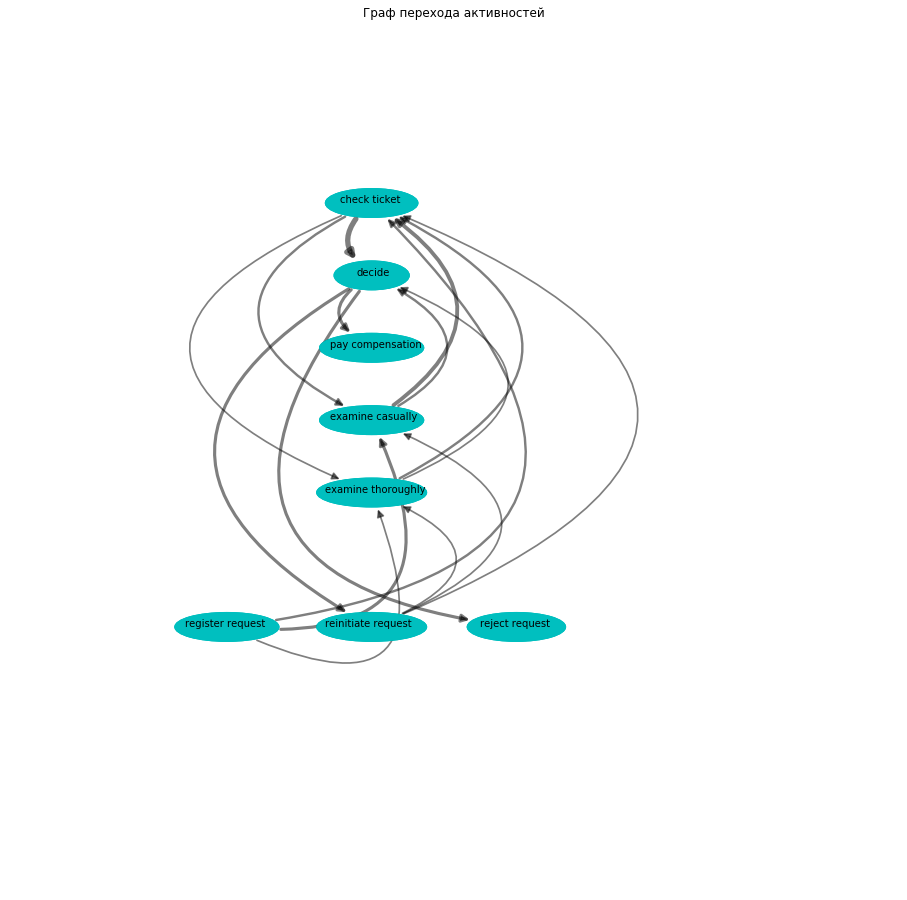

CPU times: user 582 ms, sys: 6.95 ms, total: 589 ms
Wall time: 588 ms


In [16]:
%%time
graph = Graph(log, 'Case ID', 'Activity ID', 'User ID', 'datetime')
graph.create_activities_graph()
graph.draw_activities(alpha=0.6, labels=id_act, info=None, main_nodes=5)

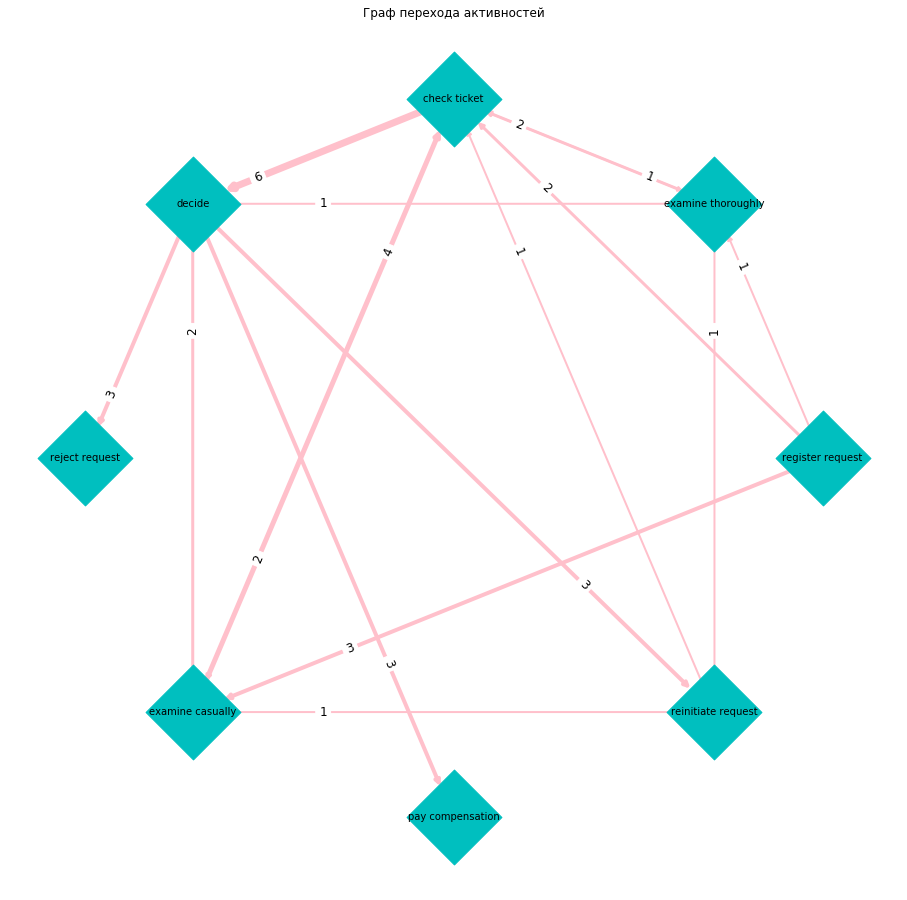

CPU times: user 278 ms, sys: 6.64 ms, total: 285 ms
Wall time: 284 ms


In [17]:
%%time
graph.draw_activities(alpha=1, 
                      labels=id_act, 
                      layout=nx.circular_layout, # можно задать расположение вершин графа 
                      info='edges',              # вывести инофрмацию о числе переходов на ребрах
                      node_size=4500, 
                      style='regular')           # без кривых стрелок

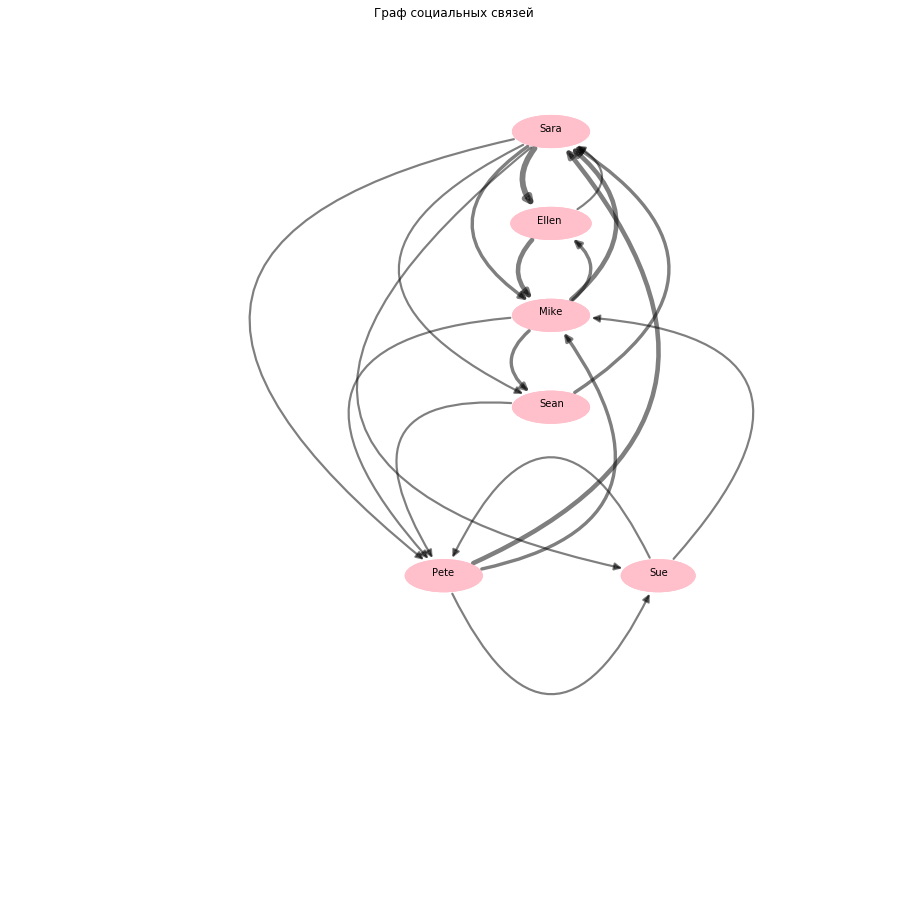

In [18]:
graph = Graph(log, 'Case ID', 'Activity ID', 'User ID', 'datetime')
g = graph.create_users_graph()
graph.draw_users(alpha=1, labels=id_usr,  info=None)

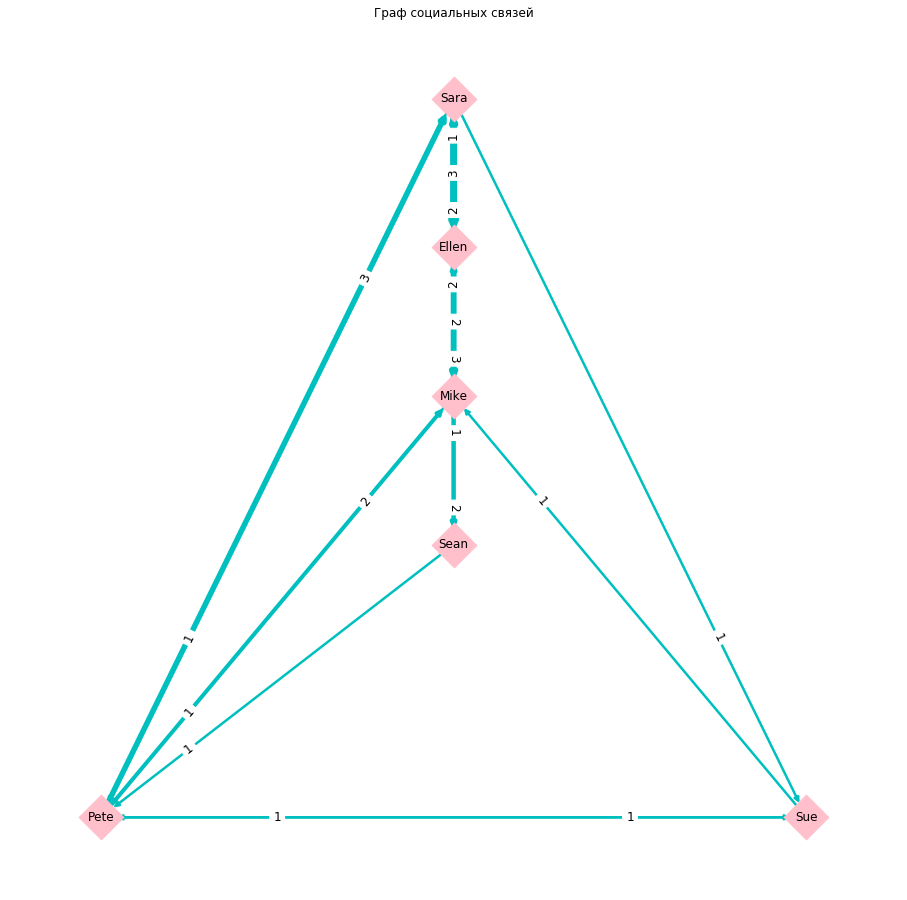

In [19]:
graph.draw_users(alpha=1.5, labels=id_usr, style=None, node_size=1000, info='edges')

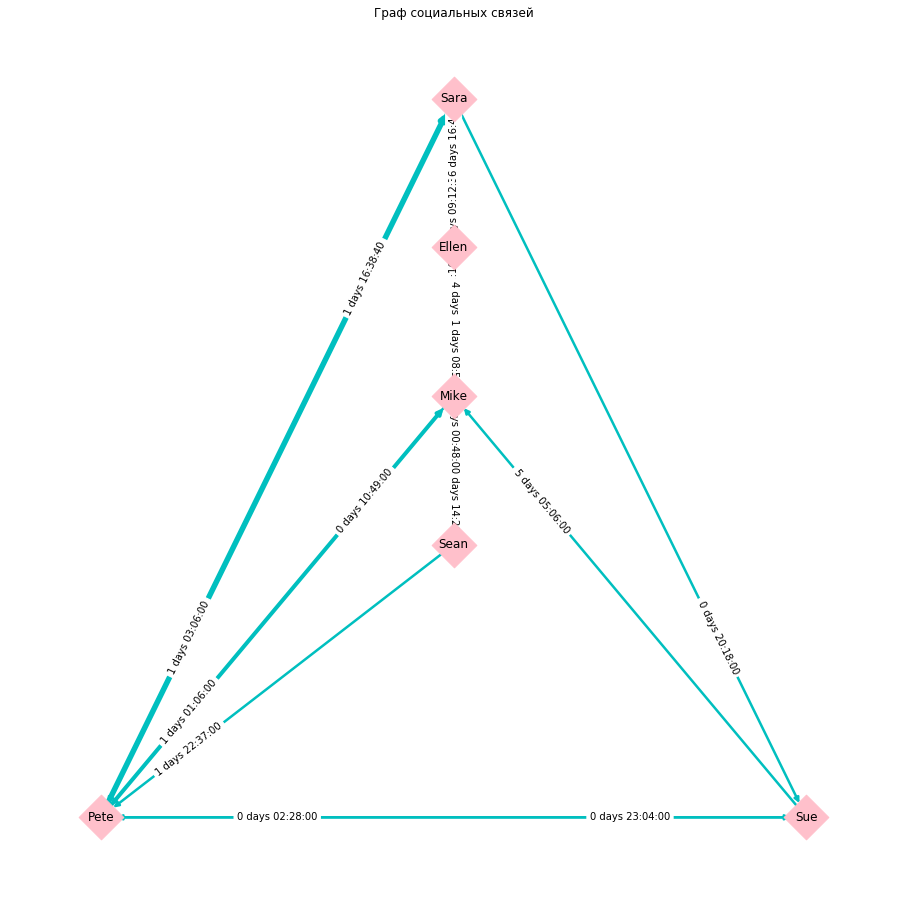

In [20]:
graph.draw_users(alpha=1.5, labels=id_usr, style=None, node_size=1000, info='time')